In [1]:

import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from funcoes_ajuda import avalia_clf

In [2]:
#%% Carregando a base

titanic = pd.read_pickle('titanic1.pkl')
# titanic = pd.read_parquet('titanic1.parquet')

In [3]:
#%%  Dividindo a base em treino e teste

# Selecionar variáveis preditoras e a variável resposta
X = titanic.drop(columns = ['survived'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [4]:
# conferindo número de linhas e colunas
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(668, 8)
(668,)
(223, 8)
(223,)


In [5]:
#%% Treinando a árvore

# Criar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(criterion='gini', 
                                max_depth = 3, 
                                random_state=42)

In [6]:
# Treinar o modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 82.8%
A acurácia balanceada da árvore é: 80.6%
AUC-ROC: 86.87%
GINI: 73.74%

               precision    recall  f1-score   support

           0       0.84      0.89      0.87       417
           1       0.80      0.72      0.76       251

    accuracy                           0.83       668
   macro avg       0.82      0.81      0.81       668
weighted avg       0.83      0.83      0.83       668



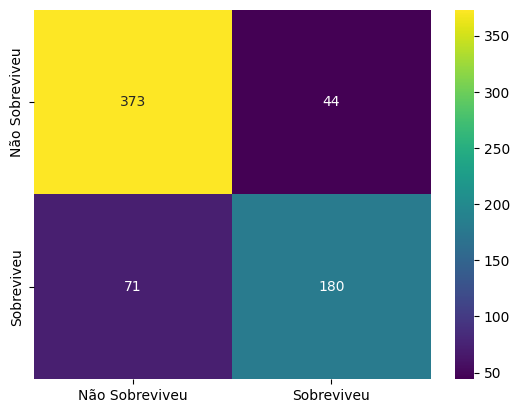

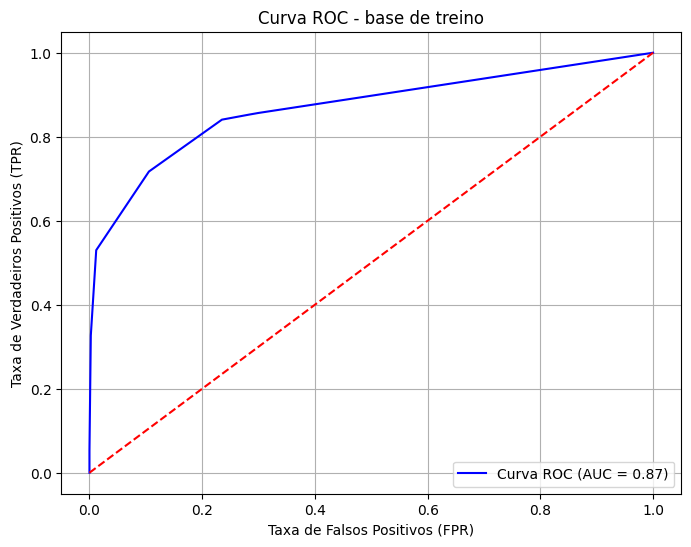

In [7]:
#%% Avaliando o modelo na base de treino

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train)

Avaliando a base de teste:

Base de treino:
A acurácia da árvore é: 82.5%
A acurácia balanceada da árvore é: 80.8%
AUC-ROC: 85.54%
GINI: 71.09%

               precision    recall  f1-score   support

           0       0.82      0.90      0.86       132
           1       0.83      0.71      0.77        91

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.82       223



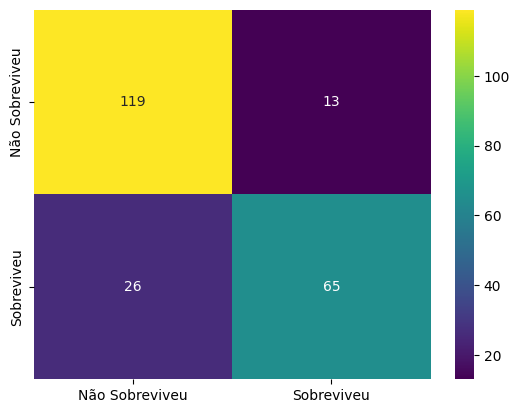

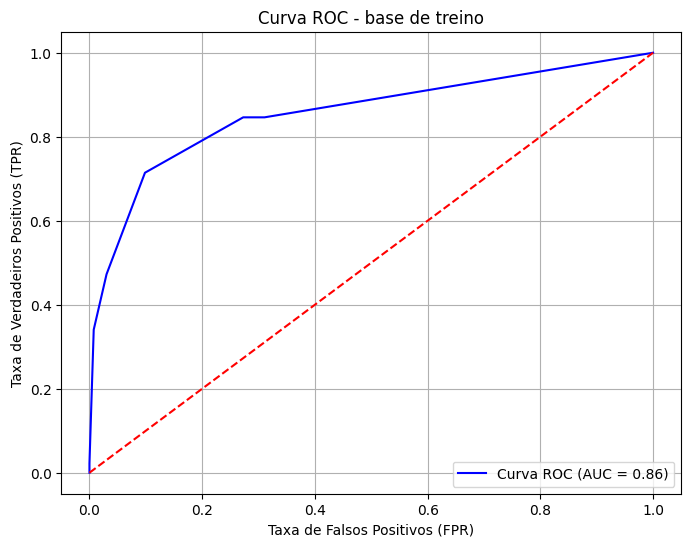

In [8]:
#%% Avaliando o modelo na base de teste
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test)

In [9]:
#%%  Deixando a árvore ser feliz

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=0)

In [10]:
# Treinar o modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=30, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 98.2%
A acurácia balanceada da árvore é: 97.8%
AUC-ROC: 99.93%
GINI: 99.85%

               precision    recall  f1-score   support

           0       0.98      1.00      0.99       417
           1       0.99      0.96      0.98       251

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



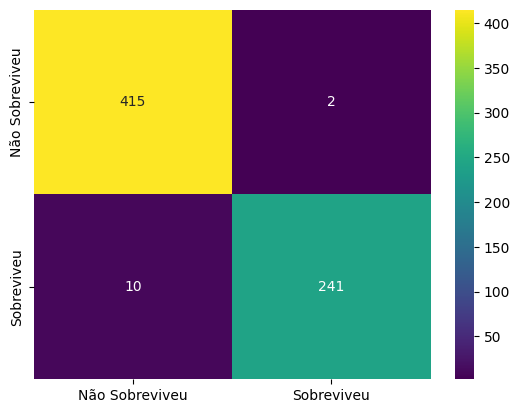

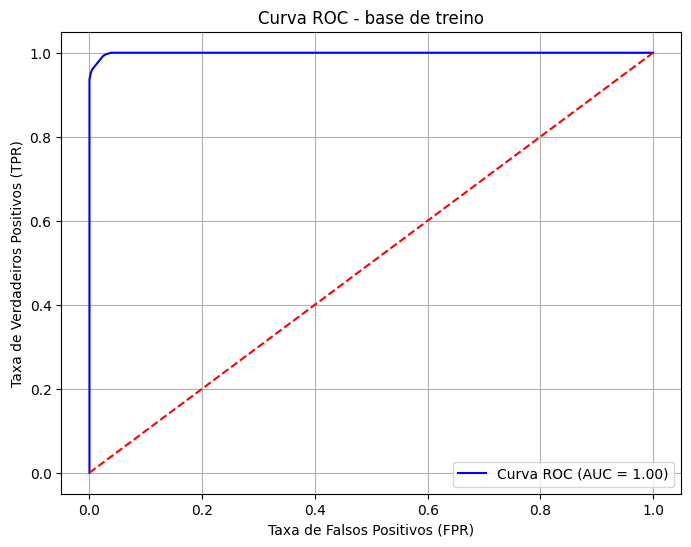

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 80.7%
A acurácia balanceada da árvore é: 79.3%
AUC-ROC: 80.84%
GINI: 61.69%

               precision    recall  f1-score   support

           0       0.82      0.87      0.84       132
           1       0.79      0.71      0.75        91

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



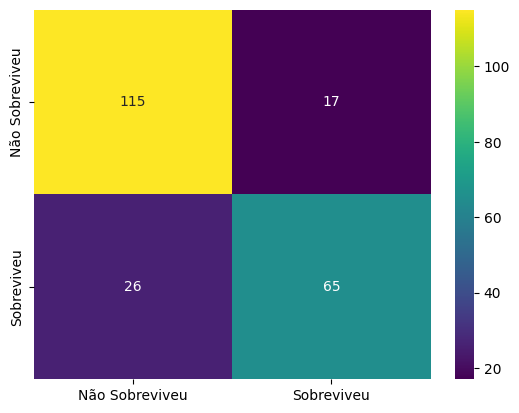

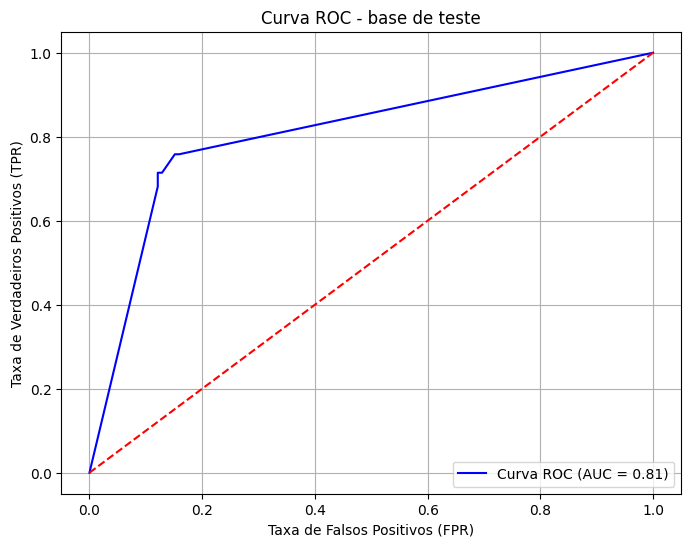

In [11]:
#%% Avaliando o modelo na base de treino e teste

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

In [12]:
#%% ccp_alpha

ccp_path = pd.DataFrame(arvore.cost_complexity_pruning_path(X_train, y_train))



O GINI máximo é de: 72.71%
Obtido com um ccp de: 0.0027237264980528456


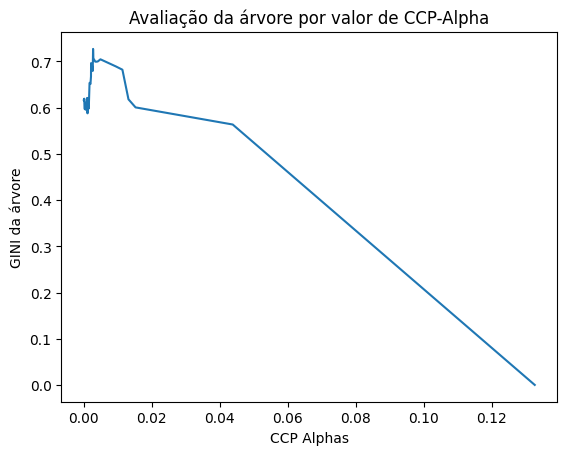

In [13]:
#%% Tunando a árvore

GINIs = []

for ccp in ccp_path['ccp_alphas']:
    arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                    random_state=42,
                                    ccp_alpha=ccp)

    # Treinar o modelo
    arvore.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

sns.lineplot(x = ccp_path['ccp_alphas'], y = GINIs)

df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

GINI_max = df_avaliacoes.GINI.max()
ccp_max  = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]

plt.ylabel('GINI da árvore')
plt.xlabel('CCP Alphas')
plt.title('Avaliação da árvore por valor de CCP-Alpha')

print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')


In [14]:
#%% Árvore ótima

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=ccp_max).fit(X_train, y_train)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 85.9%
A acurácia balanceada da árvore é: 82.2%
AUC-ROC: 89.80%
GINI: 79.61%

               precision    recall  f1-score   support

           0       0.83      0.97      0.90       417
           1       0.93      0.67      0.78       251

    accuracy                           0.86       668
   macro avg       0.88      0.82      0.84       668
weighted avg       0.87      0.86      0.85       668



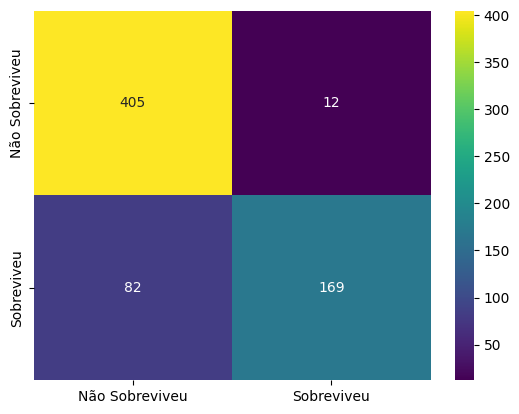

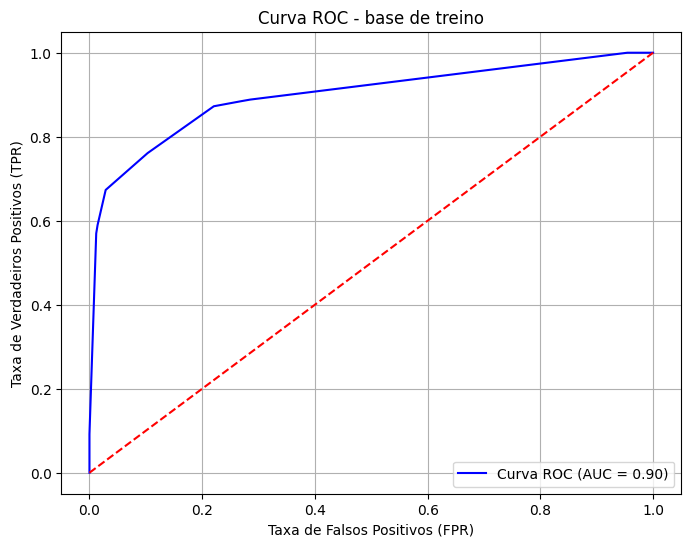

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 79.4%
A acurácia balanceada da árvore é: 76.1%
AUC-ROC: 86.36%
GINI: 72.71%

               precision    recall  f1-score   support

           0       0.77      0.94      0.84       132
           1       0.87      0.58      0.70        91

    accuracy                           0.79       223
   macro avg       0.82      0.76      0.77       223
weighted avg       0.81      0.79      0.78       223



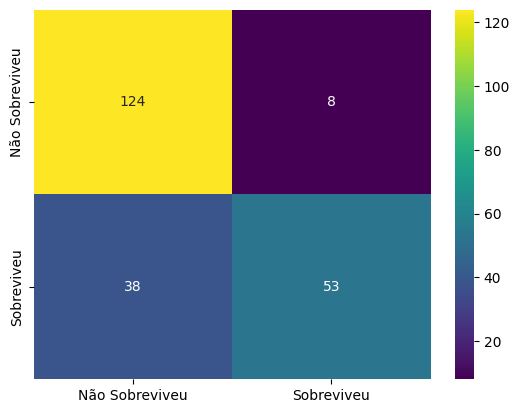

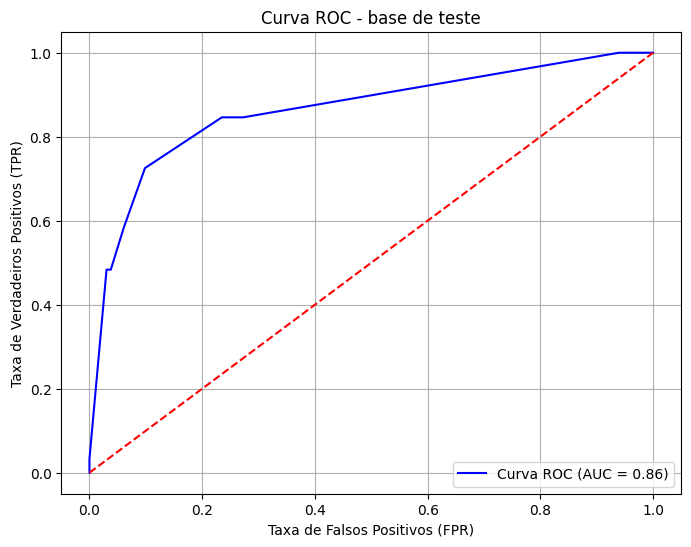

In [15]:
#%% avaliar

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')